In [1]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 8.9 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=93fd3fd6c0084c088f0715fac1626aceb36e90b1815c182d8c9b886e4d8aacb5
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Face Recognition


In [2]:
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Creating the encoding profiles
face_1 = face_recognition.load_image_file("/content/aaron.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("/content/bezos.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]


known_face_encodings = [
                        face_1_encoding,
                        face_2_encoding
]

known_face_names = [
                    "Aaron Sorkin",
                    "Jeff Bezos"
]

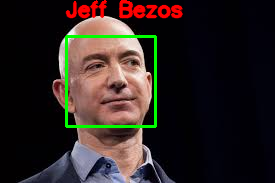

In [4]:
file_name = "/content/unknown2.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

for (top,right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = "Unknown"

  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]
  cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom),(0,255,0),2)
  cv2.putText(unknown_image_to_draw,name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX,.7,(0,0,255),2, cv2.LINE_AA)

cv2_imshow(unknown_image_to_draw)
